In [216]:
import sys
sys.version

'3.9.1 (default, Dec 11 2020, 09:29:25) [MSC v.1916 64 bit (AMD64)]'

In [217]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd

In [218]:
# data = pdr.get_data_yahoo('TSLA', start = "2020-01-01", end = "2020-12-31")

In [219]:
# yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

In [220]:
symbols = pd.read_csv("../data/nasdaqtraded.txt", delimiter="|")


In [303]:
stocks = yf.download("SPY CVNA", start="2020-01-01", end="2020-12-31")

yb = stocks['Adj Close'].iloc[0].dropna()
ye = stocks['Adj Close'].iloc[len(stocks)-1].dropna()

stocks_no_na = pd.DataFrame({'YB': yb, 'YE': ye}).dropna()
stocks_no_na['pct_chg'] = stocks_no_na['YE']/stocks_no_na['YB'] - 1
stocks_no_na = stocks_no_na.sort_values('pct_chg', ascending=False)
print(stocks_no_na)
print("Overall gain/loss: {:.2f}%".format(stocks_no_na['pct_chg'].mean()*100))

[*********************100%***********************]  2 of 2 completed
              YB          YE   pct_chg
CVNA   96.949997  250.339996  1.582156
SPY   318.914307  371.989990  0.166426
Overall gain/loss: 87.43%


In [300]:
from itertools import permutations
from collections import defaultdict

def get_portfolio_chg():
    sample_symbols = symbols.query('`Listing Exchange` == "Q"')['Symbol'].sample(n = 20).str.cat(sep = ' ')

    stocks = yf.download(sample_symbols, start="2020-01-01", end="2020-12-31")

    yb = stocks['Adj Close'].iloc[0].dropna()
    ye = stocks['Adj Close'].iloc[len(stocks)-1].dropna()

    stocks_no_na = pd.DataFrame({'YB': yb, 'YE': ye}).dropna()
    stocks_no_na['pct_chg'] = stocks_no_na['YE']/stocks_no_na['YB'] - 1

    stocks_no_na = stocks_no_na.sort_values('pct_chg', ascending=False)
    gain_loss = stocks_no_na['pct_chg'].mean()*100

    return {'stocks': stocks_no_na, 'gain_loss': gain_loss}

scenarios = defaultdict(int)
for i in range(100):
    scenarios[i] = get_portfolio_chg()

df = pd.DataFrame(scenarios)
df.iloc[1].mean

d:
- FTOCW: No data found for this date range, symbol may be delisted
[*********************100%***********************]  20 of 20 completed

1 Failed download:
- VTIQU: Data doesn't exist for startDate = 1577854800, endDate = 1609390800
[*********************100%***********************]  20 of 20 completed

2 Failed downloads:
- APOPW: No data found for this date range, symbol may be delisted
- OMEG: Data doesn't exist for startDate = 1577854800, endDate = 1609390800
[*********************100%***********************]  20 of 20 completed

3 Failed downloads:
- VCKAU: Data doesn't exist for startDate = 1577854800, endDate = 1609390800
- NGACW: No data found for this date range, symbol may be delisted
- OXBRW: No data found for this date range, symbol may be delisted
[*********************100%***********************]  20 of 20 completed

2 Failed downloads:
- OCAXU: Data doesn't exist for startDate = 1577854800, endDate = 1609390800
- BRLIR: No data found for this date range, symbol may 

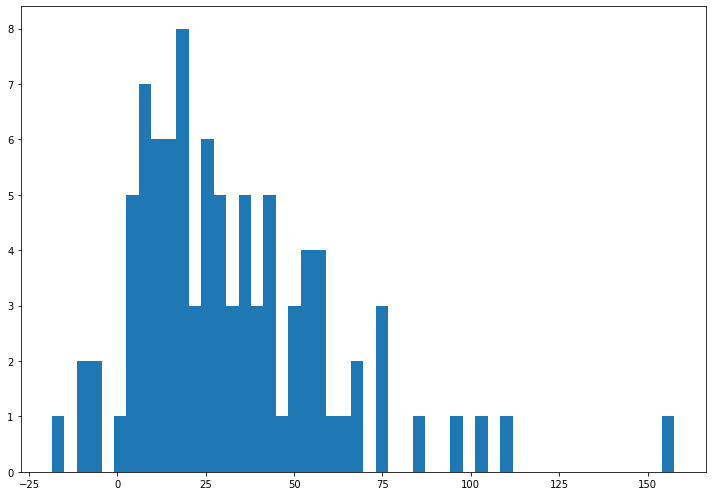

In [329]:
from matplotlib import pyplot as plt
import numpy as np

all_pct_chg = np.array(df.iloc[1])
fig, axs = plt.subplots(1, 1,
                            figsize = (10,7),
                            tight_layout = True)

axs.hist(all_pct_chg, bins = 50)

plt.show()